#Testing for diabetes
#'1' represent positive
#'0' represents negative
#User willl enter values of thier choice and the model will predict whether the have diabetes or not

In [1]:
#importing some of the libraries to be used
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

NB: To run this code there needs to be a file called 'diabetes.csv' on the loacal storage

In [2]:
#uploading the data from the local storage and printing the first five rows
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('diabetes.csv')
df.head()

Saving diabetes.csv to diabetes.csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Correlations of the columns
df.iloc[:,:].corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


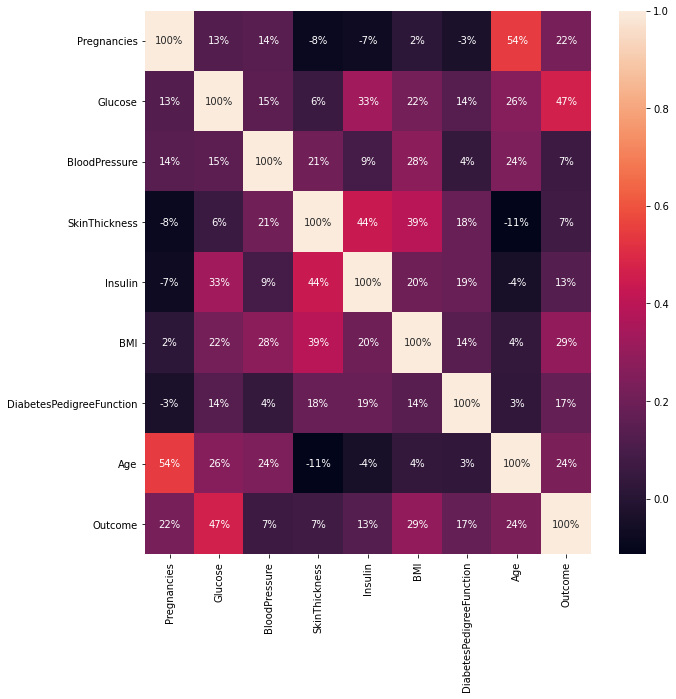

In [4]:
#Visualization of the correlation
plt.figure(figsize=(10,10))
sn.heatmap(df.iloc[:,:].corr(),annot=True, fmt= '.0%')

In [5]:
#Indices of the features
X = df.iloc[:,0:31].values
Y = df.iloc[:,8].values

In [7]:
#split the data into 70% training and 30% testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = .30, random_state=0)

In [8]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [9]:
#model configuration
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=9, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
#compling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
#Training the model
history = model.fit(X_train, Y_train, epochs=10000, batch_size=150, verbose=5)

Streaming output truncated to the last 5000 lines.
Epoch 5001/10000
Epoch 5002/10000
Epoch 5003/10000
Epoch 5004/10000
Epoch 5005/10000
Epoch 5006/10000
Epoch 5007/10000
Epoch 5008/10000
Epoch 5009/10000
Epoch 5010/10000
Epoch 5011/10000
Epoch 5012/10000
Epoch 5013/10000
Epoch 5014/10000
Epoch 5015/10000
Epoch 5016/10000
Epoch 5017/10000
Epoch 5018/10000
Epoch 5019/10000
Epoch 5020/10000
Epoch 5021/10000
Epoch 5022/10000
Epoch 5023/10000
Epoch 5024/10000
Epoch 5025/10000
Epoch 5026/10000
Epoch 5027/10000
Epoch 5028/10000
Epoch 5029/10000
Epoch 5030/10000
Epoch 5031/10000
Epoch 5032/10000
Epoch 5033/10000
Epoch 5034/10000
Epoch 5035/10000
Epoch 5036/10000
Epoch 5037/10000
Epoch 5038/10000
Epoch 5039/10000
Epoch 5040/10000
Epoch 5041/10000
Epoch 5042/10000
Epoch 5043/10000
Epoch 5044/10000
Epoch 5045/10000
Epoch 5046/10000
Epoch 5047/10000
Epoch 5048/10000
Epoch 5049/10000
Epoch 5050/10000
Epoch 5051/10000
Epoch 5052/10000
Epoch 5053/10000
Epoch 5054/10000
Epoch 5055/10000
Epoch 5056/100

dict_keys(['loss', 'accuracy'])


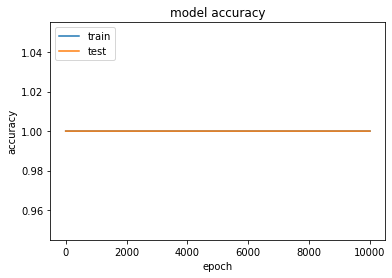

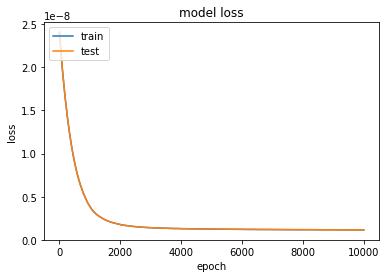

In [26]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
#predictions
predictions = model.predict_classes(X_train)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [32]:
#predictionss on the first 5 rows of the training dataset
for i in range(5):
	print(' %d (expected %d)' % (predictions[i], Y_train[i]))

 1 (expected 1)
 0 (expected 0)
 0 (expected 0)
 1 (expected 1)
 1 (expected 1)


In [33]:
#predictionss on the first 5 rows of the testing dataset
for i in range(5):
	print('%d (expected %d)' % (predictions[i], Y_test[i]))

1 (expected 1)
0 (expected 0)
0 (expected 0)
1 (expected 1)
1 (expected 0)


In [35]:
#evaluating the model
accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

8/8 [==============================] - 1s 2ms/step - loss: 6.3391e-09 - accuracy: 1.0000
[6.339103464370055e-09, 1.0]




*This part of the code is for testing from the user and it Ipywidgets for visualizations. IntSliders are used intead of the user having to input values in an input box.*

In [36]:
#Creating python lists on the columns of the data
import ipywidgets as wg
from IPython.display import display

n = int(input('Number of records:'))
Pregnancies = []
Glucose = []
BloodPressure = []
SkinThickness = []
Insulin = []
BMI = []
Age = []
DiabetesPedigreeFunction = []

for i in range(n):
    
    pregnancies = wg.IntSlider(max=10)
    l1 = wg.Label('Pregnancies')
    display(pregnancies, l1)
    
    
    
   
    glucose = wg.IntSlider(max=300)
    l2 = wg.Label('Glucose')
    display(glucose,l2)
   
   
    bloodPressure = wg.IntSlider(max=100)
    l3 = wg.Label('Bloood Pressure')
    display(bloodPressure, l3)
    
    
    skinThickness = wg.IntSlider(max=100)
    l4 = wg.Label('Skin Thickness')
    display(skinThickness, l4)
    
    
    insulin = wg.IntSlider(max=100)
    l5 = wg.Label('Insulin')
    display(insulin, l5)
    
    
    bmi = wg.IntSlider(max=100)
    l6 = wg.Label('BMI')
    display(bmi, l6)
    
   
    
   
    diabetesPedigreeFunction = wg.FloatSlider(max = 10.0)
    l7 =wg.Label('DiabetesPedigreeFunction')
    display(diabetesPedigreeFunction, l7)
    
    
    
    age = wg.IntSlider(max=100)
    l8 = wg.Label('Age')
    display(age, l8)
    

    print('---------------------------------------------')

    Pregnancies.append(pregnancies)
    Glucose.append(glucose)
    BloodPressure.append(bloodPressure)
    SkinThickness.append(skinThickness )
    Insulin.append(insulin )
    BMI.append(bmi)
    Age.append(age)
    



Number of records:1


IntSlider(value=0, max=10)

Label(value='Pregnancies')

IntSlider(value=0, max=300)

Label(value='Glucose')

IntSlider(value=0)

Label(value='Bloood Pressure')

IntSlider(value=0)

Label(value='Skin Thickness')

IntSlider(value=0)

Label(value='Insulin')

IntSlider(value=0)

Label(value='BMI')

FloatSlider(value=0.0, max=10.0)

Label(value='DiabetesPedigreeFunction')

IntSlider(value=0)

Label(value='Age')

---------------------------------------------


In [37]:
#Convering the user input into dataframe
a = {'Pregnancies': pregnancies.value, 'Glucose':glucose.value,' BloodPressure': bloodPressure.value,' SkinThickness': skinThickness.value,'Insulin':insulin.value,' BMI': bmi.value,'Age':Age}
b = pd.DataFrame(a)
c = np.array(b)
print(b)

   Pregnancies  Glucose   BloodPressure  ...  Insulin   BMI                  Age
0            4       88              31  ...       29    59  IntSlider(value=37)

[1 rows x 7 columns]


In [38]:
#Results
btn = wg.Button(description ='Results',disabled=False,button_style='info',tooltip='Results')
out = wg.Output()
display(btn,out)
def on_btn_clk(b):
    with out:
        for i in range(n):
	          print('%d (expected %d)' % (predictions[i], Y_test[i]))
btn.on_click(on_btn_clk)

Button(button_style='info', description='Results', style=ButtonStyle(), tooltip='Results')

Output()